In [103]:
# Imports

import pandas as pd
from datetime import datetime


In [104]:
# Load data

food_1 = pd.read_csv("data/food/Food_Log_001.csv")
food_2 = pd.read_csv("data/food/Food_Log_002.csv")
food_3 = pd.read_csv("data/food/Food_Log_003.csv")
food_4 = pd.read_csv("data/food/Food_Log_004.csv")
food_5 = pd.read_csv("data/food/Food_Log_005.csv")
food_6 = pd.read_csv("data/food/Food_Log_006.csv")
food_7 = pd.read_csv("data/food/Food_Log_007.csv")
food_8 = pd.read_csv("data/food/Food_Log_008.csv")
food_9 = pd.read_csv("data/food/Food_Log_009.csv")
food_10 = pd.read_csv("data/food/Food_Log_010.csv")
food_11 = pd.read_csv("data/food/Food_Log_011.csv")
food_12 = pd.read_csv("data/food/Food_Log_012.csv")
food_13 = pd.read_csv("data/food/Food_Log_013.csv")
food_14 = pd.read_csv("data/food/Food_Log_014.csv")
food_15 = pd.read_csv("data/food/Food_Log_015.csv")
food_16 = pd.read_csv("data/food/Food_Log_016.csv")

In [105]:

def combine_food():
    food_tables = [food_1, food_2, food_3, food_4, food_5, food_6, food_7, food_8, food_9, food_10, food_11, food_12, food_13, food_14, food_15, food_16]
    food_df = pd.DataFrame()

    for i in range(16):
        food_copy = food_tables[i].copy()
        food_copy['participant_id'] = [i+1]*food_copy.shape[0]
        food_df = pd.concat([food_df, food_copy], axis=0)

    return food_df

combined_food_df = combine_food()[['participant_id', 'time', 'sugar']]
# combined_food_df


In [106]:
hr_1 = pd.read_csv("data/hr/HR_001.csv")
hr_2 = pd.read_csv("data/hr/HR_002.csv")
hr_3 = pd.read_csv("data/hr/HR_003.csv")
hr_4 = pd.read_csv("data/hr/HR_004.csv")
hr_5 = pd.read_csv("data/hr/HR_005.csv")
hr_6 = pd.read_csv("data/hr/HR_006.csv")
hr_7 = pd.read_csv("data/hr/HR_007.csv")
hr_8 = pd.read_csv("data/hr/HR_008.csv")
hr_9 = pd.read_csv("data/hr/HR_009.csv")
hr_10 = pd.read_csv("data/hr/HR_010.csv")
hr_11 = pd.read_csv("data/hr/HR_011.csv")
hr_12 = pd.read_csv("data/hr/HR_012.csv")
hr_13 = pd.read_csv("data/hr/HR_013.csv")
hr_14 = pd.read_csv("data/hr/HR_014.csv")
hr_15 = pd.read_csv("data/hr/HR_016.csv")
hr_16 = pd.read_csv("data/hr/HR_016.csv")



In [108]:
hr_1.head()

,datetime,hr
0,2/13/20 15:29,94.0
1,2/13/20 15:29,99.0
2,2/13/20 15:29,94.0
3,2/13/20 15:29,82.5
4,2/13/20 15:29,82.6


In [109]:
def combine_hr():
    hr_tables = [hr_1, hr_2, hr_3, hr_4, hr_5, hr_6, hr_7, hr_8, hr_9, hr_10, hr_11, hr_12, hr_13, hr_14, hr_15, hr_16]
    hr_df = pd.DataFrame()

    for i in range(16):
        hr_copy = hr_tables[i].copy()
        hr_copy['participant_id'] = [i+1]*hr_copy.shape[0]
        hr_copy['time'] = pd.to_datetime(hr_copy['datetime']).dt.strftime("%H:%M")
        hr_df = pd.concat([hr_df, hr_copy], axis=0)

    return hr_df

combined_hr_df = combine_hr()[['participant_id', 'time', ' hr']]
# combined_hr_df

/var/folders/43/kk5s6cn52lv1g9lf0yhbq2r80000gn/T/ipykernel_29592/548627589.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hr_copy['time'] = pd.to_datetime(hr_copy['datetime']).dt.strftime("%H:%M")


In [110]:
combined_hr_df['time'] = pd.to_datetime(combined_hr_df['time'])
combined_hr_df['Hour'] = combined_hr_df['time'].dt.hour
hourly_hr = combined_hr_df.groupby('Hour')[' hr'].mean().reset_index()
combined_hr_df = combined_hr_df.drop(columns = ['time'])


/var/folders/43/kk5s6cn52lv1g9lf0yhbq2r80000gn/T/ipykernel_29592/952473304.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_hr_df['time'] = pd.to_datetime(combined_hr_df['time'])


In [111]:
combined_food_df['time'] = pd.to_datetime(combined_food_df['time'])
combined_food_df['Hour'] = combined_food_df['time'].dt.hour
combined_food_df = combined_food_df.drop(columns = ['time'])
hourly_sugar = combined_food_df.groupby('Hour')['sugar'].mean().reset_index()
# hourly_sugar

/var/folders/43/kk5s6cn52lv1g9lf0yhbq2r80000gn/T/ipykernel_29592/3170950168.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_food_df['time'] = pd.to_datetime(combined_food_df['time'])


In [112]:
demo_data = pd.read_csv("data/Demographics.csv")

In [113]:
demo_data['a1c_type'] = demo_data['HbA1c'].apply(lambda val: 'Normal' if val < 5.7 else 'Prediabetes' )

In [114]:
combined_hr_df = combined_hr_df.merge(demo_data[['ID', 'Gender', 'a1c_type']], left_on= 'participant_id' ,right_on='ID').drop(columns='ID')

In [115]:
final_df = pd.merge(combined_hr_df, combined_food_df, left_on=['participant_id', 'Hour'], right_on=['participant_id', 'Hour'], how='left').fillna(0)

In [117]:
sugar_df_diabetes = final_df.groupby(['Hour','a1c_type']).agg({'sugar' : 'mean'}).reset_index()
sugar_df = final_df.groupby('Hour').agg({'sugar' : 'mean'}).reset_index()

In [118]:
hr_df_diabetes = final_df.groupby(['Hour','a1c_type'])[' hr'].mean().reset_index()
hr_df = final_df.groupby('Hour')[' hr'].mean().reset_index()

In [124]:
merged_final_diabetes_df = pd.merge(sugar_df_diabetes,hr_df_diabetes, on=['Hour','a1c_type'])
merged_final_diabetes_df.to_csv('merged_final_diabetes_df.csv')
merged_final_df = pd.merge(sugar_df,hr_df, on=['Hour'])
merged_final_df.to_csv('merged_final_df.csv')

<Figure size 1400x600 with 0 Axes>

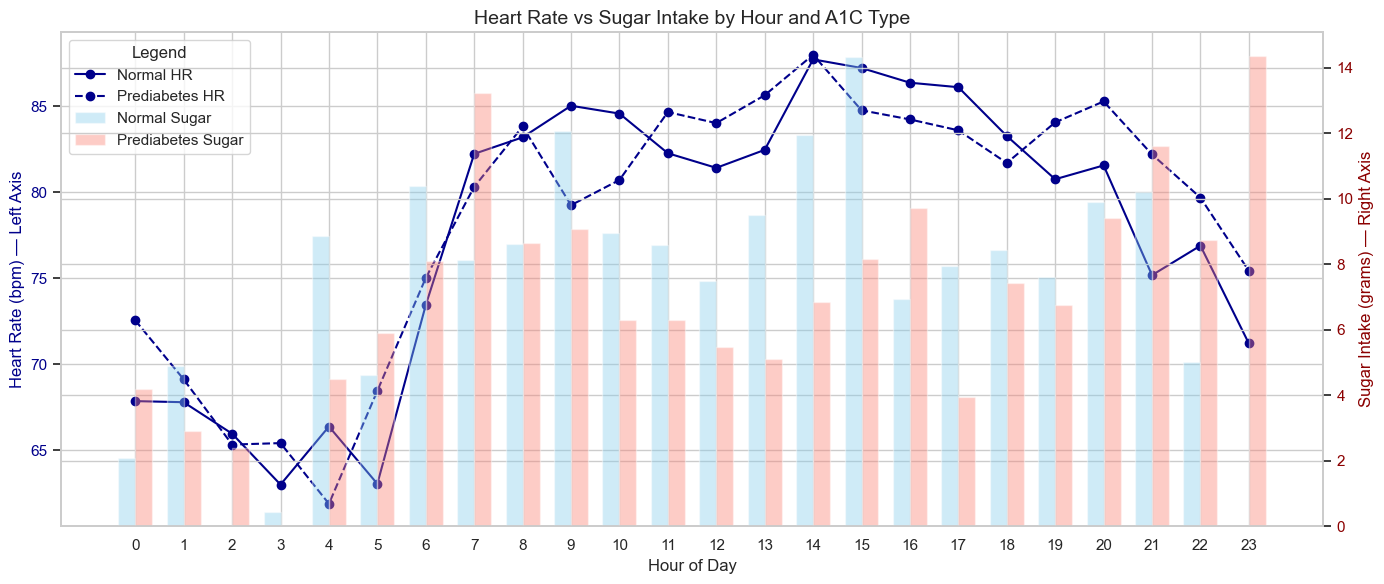

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.set(style="whitegrid")

# Axes setup
fig, ax1 = plt.subplots(figsize=(14, 6))
ax2 = ax1.twinx()

# Line plot with same color, different styles
for a1c_type, linestyle in zip(['Normal', 'Prediabetes'], ['solid', 'dashed']):
    subset = merged_final_diabetes_df[merged_final_diabetes_df['a1c_type'] == a1c_type]
    ax1.plot(subset['Hour'], subset[' hr'], label=f'{a1c_type} HR', linestyle=linestyle, color='darkblue', marker='o')

# Adjust bar plot to show side-by-side bars
bar_width = 0.35
bar_colors = {'Normal': 'skyblue', 'Prediabetes': 'salmon'}
hour_positions = merged_final_diabetes_df['Hour'].unique()

for i, a1c_type in enumerate(['Normal', 'Prediabetes']):
    sub = merged_final_diabetes_df[merged_final_diabetes_df['a1c_type'] == a1c_type]
    ax2.bar(sub['Hour'] + (i - 0.5)*bar_width, sub['sugar'],
            width=bar_width, alpha=0.4,
            color=bar_colors[a1c_type], label=f'{a1c_type} Sugar')

# Labeling
ax1.set_title('Heart Rate vs Sugar Intake by Hour and A1C Type', fontsize=14)
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Heart Rate (bpm)', color='darkblue')
ax2.set_ylabel('Sugar Intake (grams)', color='darkred')
ax1.tick_params(axis='y', labelcolor='darkblue')
ax2.tick_params(axis='y', labelcolor='darkred')
plt.xticks(range(0, 24))

# Custom legend combining both axes
lines_labels = ax1.get_legend_handles_labels()
bars_labels = ax2.get_legend_handles_labels()
ax1.legend(lines_labels[0] + bars_labels[0], lines_labels[1] + bars_labels[1], loc='upper left', title='Legend')


plt.tight_layout()
plt.show()

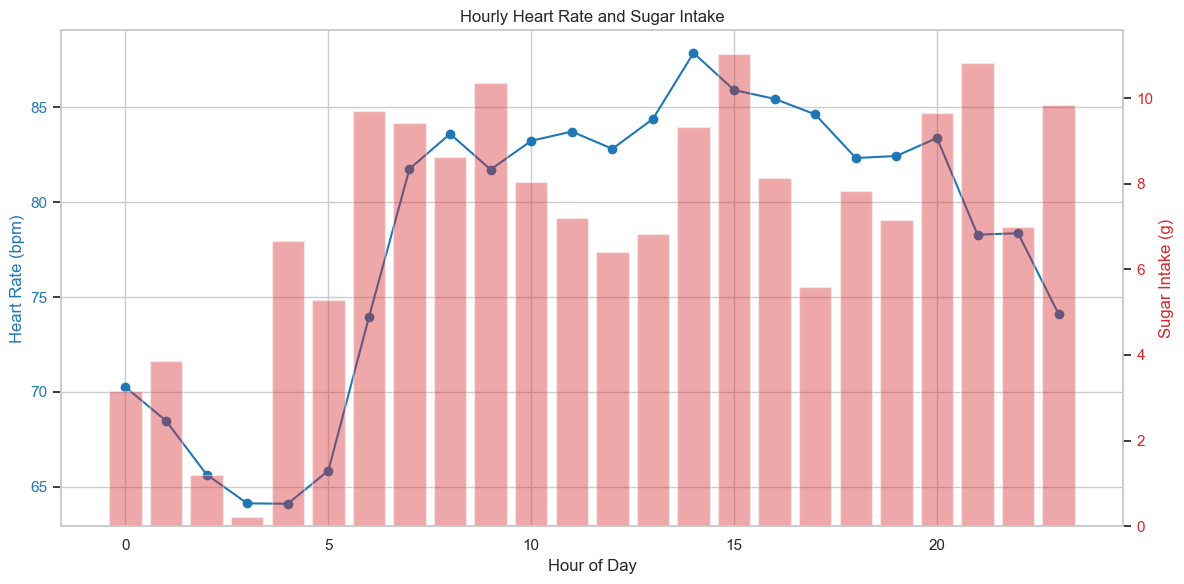

In [121]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Heart Rate (bpm)', color=color)
ax1.plot(merged_final_df['Hour'], merged_final_df[' hr'], color=color, marker='o', label='Avg Heart Rate')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Sugar Intake (g)', color=color)
ax2.bar(merged_final_df['Hour'], merged_final_df['sugar'], color=color, alpha=0.4, label='Sugar Intake')
ax2.tick_params(axis='y', labelcolor=color)

plt.title(f'Hourly Heart Rate and Sugar Intake')
fig.tight_layout()
plt.grid()
# plt.savefig('HeartRate_SugarIntake.png')
plt.show()

In [122]:
final_df.to_csv('merged_df.csv')